In [2]:
from preprocessing.eeg_data import load_and_preprocess, extract_epochs_and_labels
from models.csp import run_csp_svm

# Step 1: Load + preprocess EEG
raw = load_and_preprocess()
X, y = extract_epochs_and_labels(raw)

# Step 2: Train CSP + SVM
accuracy, model = run_csp_svm(X, y)

print(f"Classification Accuracy: {accuracy * 100:.2f}%")


Extracting EDF parameters from /Users/ruthsharon/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/ruthsharon/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 

In [1]:
from llm.feedback_generator import generate_feedback

prediction = 1  
confidence = 0.91

feedback = generate_feedback(prediction, confidence)
print(feedback)


Fantastic job on completing your motor imagery trial! Your ability to imagine moving your right hand with such clarity and precision is truly impressive, as shown by the high confidence prediction by the brain-signal classifier. Keep harnessing this focus and continue practicing regularly. Each session strengthens the connection between your mind and body, boosting your ability to control your thoughts with intention. Keep up the great work—you’re making amazing progress!


In [2]:
feedback = generate_feedback(1, confidence=0.91)
print(feedback)

Fantastic job! Your focused effort on imagining right-hand movement paid off, and the brain-signal classifier recognized it with high confidence. Keep up the great work by maintaining this level of concentration. Each session strengthens your neural pathways, so let's continue building on this success. You're making incredible progress!


In [2]:
from preprocessing.eeg_data import load_and_preprocess, extract_epochs_and_labels
from models.csp import run_csp_svm

# Step 1: Load EEG
raw = load_and_preprocess()
X, y = extract_epochs_and_labels(raw)

# Step 2: Train CSP + SVM pipeline
accuracy, model = run_csp_svm(X, y)

print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Extracting EDF parameters from /Users/ruthsharon/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/ruthsharon/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 

In [3]:
from models.meta_model import build_meta_dataset, train_meta_model, predict_correctness

# Extract CSP-transformed features from full data
csp = model.named_steps['csp']
svm = model.named_steps['svm']
X_csp = csp.transform(X)

# Build meta dataset (confidence + correctness)
meta_X, meta_y = build_meta_dataset(svm, X_csp, y)

# Train meta-model to predict whether base model is correct
meta_model = train_meta_model(meta_X, meta_y)

# Test it on a new trial (e.g., trial 0)
confidence = svm.decision_function([X_csp[0]])[0]
reliability = predict_correctness(meta_model, confidence)

print(f"Predicted reliability (P[correct] on trial 0): {reliability:.2f}")

Predicted reliability (P[correct] on trial 0): 0.88


In [4]:
csp = model.named_steps['csp']  # from your trained pipeline
csp.plot_patterns(info=raw.info, ch_type='eeg', units='Patterns (AU)')

RuntimeError: No digitization points found.

In [5]:
csp = model.named_steps['csp']
print("CSP patterns:\n", csp.patterns_)

CSP patterns:
 [[ 1.82045744e-05 -2.11474426e-06]
 [-2.55765246e-05 -2.74222422e-05]]


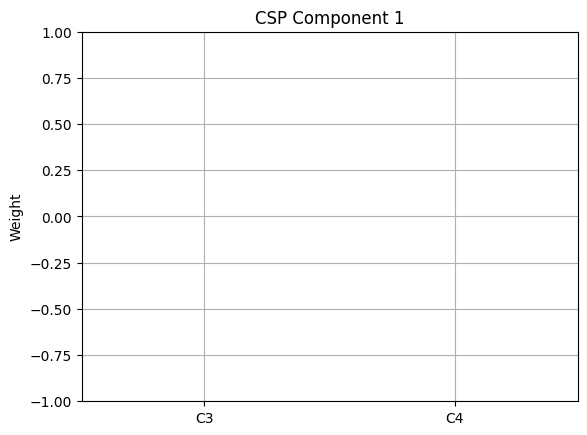

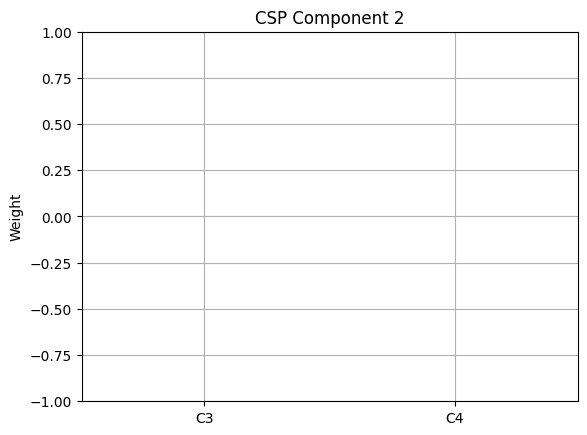

In [6]:
import matplotlib.pyplot as plt

weights = csp.patterns_

for i, comp in enumerate(weights):
    plt.figure()
    plt.bar(['C3', 'C4'], comp)
    plt.title(f'CSP Component {i+1}')
    plt.ylabel('Weight')
    plt.ylim(-1, 1)
    plt.grid(True)
    plt.show()

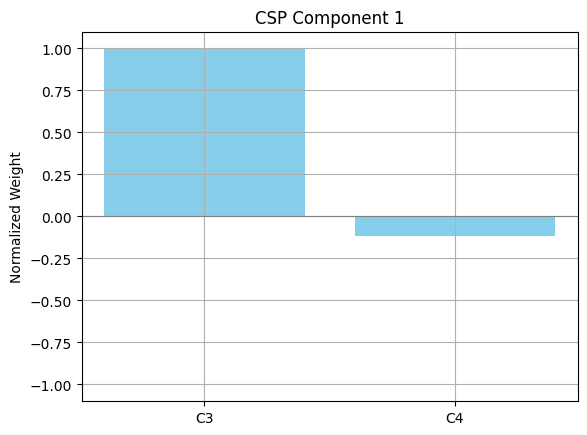

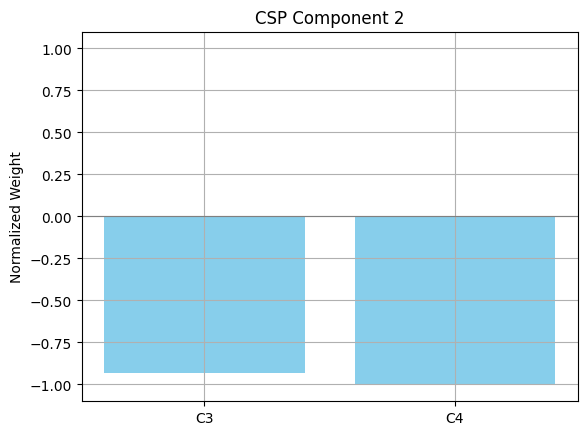

In [7]:
import matplotlib.pyplot as plt
import numpy as np

patterns = csp.patterns_

# Normalize each component for better visibility
patterns_scaled = patterns / np.max(np.abs(patterns), axis=1, keepdims=True)

for i, comp in enumerate(patterns_scaled):
    plt.figure()
    plt.bar(['C3', 'C4'], comp, color='skyblue')
    plt.title(f'CSP Component {i+1}')
    plt.ylabel('Normalized Weight')
    plt.ylim(-1.1, 1.1)
    plt.grid(True)
    plt.axhline(0, color='gray', linewidth=0.8)
    plt.show()

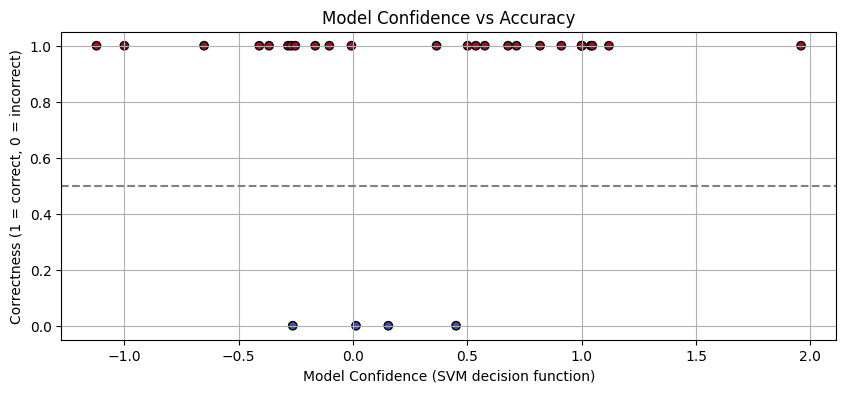

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

csp = model.named_steps['csp']
svm = model.named_steps['svm']
X_csp = csp.transform(X)

confidences = svm.decision_function(X_csp)  
predictions = svm.predict(X_csp)
correct = (predictions == y).astype(int)

sorted_indices = np.argsort(confidences)
sorted_conf = confidences[sorted_indices]
sorted_correct = correct[sorted_indices]

plt.figure(figsize=(10, 4))
plt.scatter(sorted_conf, sorted_correct, c=sorted_correct, cmap='coolwarm', edgecolors='k')
plt.axhline(0.5, color='gray', linestyle='--')
plt.title("Model Confidence vs Accuracy")
plt.xlabel("Model Confidence (SVM decision function)")
plt.ylabel("Correctness (1 = correct, 0 = incorrect)")
plt.grid(True)
plt.show()